# Classification Exercises

In [1]:
import env
import acquire
import prepare
# import pandas_profiling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import radviz
from scipy import stats
from pydataset import data
from sklearn.model_selection import train_test_split

In [2]:
plt.rc('figure', figsize=(16,9))
plt.rc('axes.spines', top=False, right=False)
plt.rc('patch', ec='black', force_edgecolor=True)
plt.rc('font', size=16)

sns.set(rc={'figure.figsize': (16,9),
            'font.size': 16})

### 1.
Use a python module (`pydata` or `seaborn` datasets) containing datasets as a source from the iris data. Create a `pandas` dataframe, df_iris, from this data.

In [3]:
# Thank you Faith and Adam :)
# data('iris', show_doc=True)

In [4]:
df_iris = data('iris')

# df_iris.to_csv('iris.csv') # cached
# type(df_iris) >>> pandas.core.frame.DataFrame

Print the first 3 rows

In [5]:
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


Print the number of rows and columns

In [6]:
df_iris.shape

(150, 5)

Print the column names

In [7]:
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

Print the data type of each column

In [8]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


Print the summary statistics for each of the numeric variables. __Would you recommend rescaling the data based on these statistics__?

In [9]:
# I would say no to rescaling. There are no extreme values present.
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 2.

Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

In [10]:
df_excel = pd.read_excel('Spreadsheets_Exercises.xlsx')
# type(df_excel)  >>> pandas.core.frame.DataFrame

Assign the first 100 rows to a new dataframe, df_excel_sample

In [11]:
df_excel_sample = df_excel.head(100)
df_excel_sample.shape

(100, 12)

Print the number of rows of your original dataframe

In [12]:
df_excel.shape[0]

7049

Print the first 5 column names

In [13]:
df_excel.columns[:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

Print the column names that have a data type of object

In [14]:
df_excel.select_dtypes('object').columns

Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'churn'],
      dtype='object')

In [15]:
# Adding `df.select_dtypes` to my utility belt!
# df_excel.select_dtypes('float64')

Compute the range for each of the numeric variables.

In [16]:
telco_stats_data = df_excel.describe()

In [17]:
value_ranges = telco_stats_data.loc['max'] \
               - telco_stats_data.loc['min']
value_ranges.name = 'range'
telco_stats_data.append(value_ranges)

,is_senior_citizen,phone_service,internet_service,contract_type,monthly_charges,total_charges
count,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7038.000000
mean,0.162009,1.324585,1.222585,0.690878,64.747014,2283.043883
std,0.368485,0.642709,0.779068,0.833757,30.099460,2266.521984
min,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,1.000000,1.000000,0.000000,35.450000,401.587500
50%,0.000000,1.000000,1.000000,0.000000,70.350000,1397.100000
75%,0.000000,2.000000,2.000000,1.000000,89.850000,3793.775000
max,1.000000,2.000000,2.000000,2.000000,118.750000,8684.800000
range,1.000000,2.000000,2.000000,2.000000,100.500000,8666.000000


### 3.
Read the data from a google sheet into a dataframe, df_google

In [18]:
url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

In [19]:
csv_export_url = url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)

Print the first 3 rows

In [20]:
df_google.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Print the number of rows and columns

In [21]:
df_google.shape

(891, 12)

Print the column names

In [22]:
list(df_google.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

Print the data type of each column

In [23]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


print the summary statistics for each of the numeric variables

In [24]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Print the unique values for each of your categorical variables

In [25]:
df_google.select_dtypes('object').nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

# acquire.py

In [26]:
# I learned that in order to use a module/library as code in an imported file,
# The imported file needs to import those modules/libraries
# import acquire

In [27]:
# dataframe is properly formatted
acquire.get_titanic_data().head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [28]:
# dataframe is properly formatted
acquire.get_iris_data().head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


# Data Preparation

## 1.
Iris Data

Use the function defined in `acquire.py` to load the iris data.

In [29]:
df_iris = acquire.get_iris_data()

Drop the `species_id` and measurement_id columns.

In [30]:
df_iris.drop(columns=['species_id', 'measurement_id'], inplace=True)

Rename the `species_name` column to just `species`.

In [31]:
df_iris.rename(columns={'species_name': 'species'}, inplace=True)

Create dummy variables of the species name.

In [32]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [33]:
# Setosa is 00
encoded_species = pd.get_dummies(
    df_iris.species,
    prefix='species',
    drop_first=True
)

# encoded_species.sample(3)

In [34]:
df_iris = pd.concat([df_iris, encoded_species], axis=1)

Create a function named `prep_iris` that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [35]:
def prep_iris(df):
    '''
    prep_iris accepts the iris dataset and returns a transformed iris dataset
    for exploratory analysis.
    type(df) >>> pandas.core.frame.DataFrame
    '''
    df.drop(columns=['species_id', 'measurement_id'], inplace=True)
    df.rename(columns={'species_name': 'species'}, inplace=True)
    encoded_species = pd.get_dummies(
        df_iris.species, prefix='species',drop_first=True
    )
    df = pd.concat([df_iris, encoded_species], axis=1)
    return df

In [36]:
df_iris = acquire.get_iris_data()
prep_iris(df_iris).sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
101,5.8,2.7,5.1,1.9,virginica,0,1
53,5.5,2.3,4.0,1.3,versicolor,1,0
112,6.8,3.0,5.5,2.1,virginica,0,1
83,6.0,2.7,5.1,1.6,versicolor,1,0
0,5.1,3.5,1.4,0.2,setosa,0,0


# 2.
Use the function you defined in acquire.py to load the titanic data set.

In [37]:
df_titanic = acquire.get_titanic_data()

Handle the missing values in the `embark_town` and `embarked` columns.

In [38]:
df_titanic.dropna(how='any', subset=['embarked'], inplace=True)

Remove the `deck` column.

In [39]:
df_titanic.drop(columns='deck', inplace=True)

Create a dummy variable of the `embarked` column.

In [40]:
# df_titanic.embark_town.value_counts()

In [41]:
# Cherbourg, C == 00
encoded_embarked = pd.get_dummies(
    df_titanic.embarked,
    prefix='embarked',
    drop_first=True)

Scale the `age` and `fare` columns using a min max scaler. Why might this be beneficial? When might you not want to do this?
- If the values are negative?
- Use on an attribute that has outliers or is disbursed very broadly (large standard deviation).
- If the values are not of type float.
- If the columns refer to the same record and have different units of measurement
    - Height measured in feet., Length measured in yards.
        - Convert Length to feet first use the minmaxscalar.

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler = MinMaxScaler()
df_titanic[['age', 'fare']] = scaler.fit_transform(df_titanic[['age', 'fare']])

In [44]:
# df_titanic.head()

Fill the missing values in `age`. The way you fill these values is up to you. Consider the tradeoffs of different methods.

In [45]:
median = df_titanic.age.median()

In [46]:
# df_titanic.age.mean()

In [47]:
df_titanic.age = df_titanic.age.fillna(median)

Create a function named `prep_titanic` that accepts the untransformed titanic data, and returns the data with the transformations above applied.

In [48]:
def prep_titanic(df):
    df.dropna(how='any', subset=['embarked'], inplace=True)
    df.drop(columns='deck', inplace=True)
    
    encoded_embarked = pd.get_dummies(df.embarked, prefix='embarked', drop_first=True)
    
    scaler = MinMaxScaler()
    df[['age', 'fare']] = scaler.fit_transform(df[['age', 'fare']])
    
    return df

Check to see if both functions work correctly

In [49]:
import acquire
import prepare

In [50]:
df_titanic = acquire.get_titanic_data()
df_titanic = prepare.prep_titanic(df_titanic)

In [51]:
df_titanic.head()

,survived,sex,age,sibsp,parch,fare,class,embark_town,alone,embark_Queenstown,embark_Southampton
0,0,male,0.271174,1,0,0.014151,Third,Southampton,0,0,1
1,1,female,0.472229,1,0,0.139136,First,Cherbourg,0,0,0
2,1,female,0.321438,0,0,0.015469,Third,Southampton,1,0,1
3,1,female,0.434531,1,0,0.103644,First,Southampton,0,0,1
4,0,male,0.434531,0,0,0.015713,Third,Southampton,1,0,1


In [52]:
df_titanic.head()

,survived,sex,age,sibsp,parch,fare,class,embark_town,alone,embark_Queenstown,embark_Southampton
0,0,male,0.271174,1,0,0.014151,Third,Southampton,0,0,1
1,1,female,0.472229,1,0,0.139136,First,Cherbourg,0,0,0
2,1,female,0.321438,0,0,0.015469,Third,Southampton,1,0,1
3,1,female,0.434531,1,0,0.103644,First,Southampton,0,0,1
4,0,male,0.434531,0,0,0.015713,Third,Southampton,1,0,1


In [53]:
df_iris = acquire.get_iris_data()
prepare.prep_iris(df_iris).head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


# Exploratory Analysis

## Iris Dataset

In [118]:
df_iris = acquire.get_iris_data()
df_iris = prepare.prep_iris(df_iris)

In [119]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


Split your data into train, test, and validate samples.

In [120]:
# Split the data into train and test sets.
train, test = train_test_split(df_iris,
                               test_size=.3)

# Split the train set into train and validate sets.
train, validate = train_test_split(train,
                               test_size=.2)

In [121]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
35,5.0,3.2,1.2,0.2,setosa,0,0
38,4.4,3.0,1.3,0.2,setosa,0,0
24,4.8,3.4,1.9,0.2,setosa,0,0
88,5.6,3.0,4.1,1.3,versicolor,1,0
142,5.8,2.7,5.1,1.9,virginica,0,1


In [122]:
# For measurement purposes, create a new dataframe with dropped dummy
# variables.
measurements = train.drop(columns=['species_versicolor',
                                   'species_virginica']
                         )

In [123]:
# Melt the data on the species column and melt the data into two
# 3 columns: species, 
variable_values = measurements.melt(id_vars='species',
                                    value_name='measurement_in_cm')

In [124]:
variable_values.head()

,species,variable,measurement_in_cm
0,setosa,sepal_length,5.0
1,setosa,sepal_length,4.4
2,setosa,sepal_length,4.8
3,versicolor,sepal_length,5.6
4,virginica,sepal_length,5.8


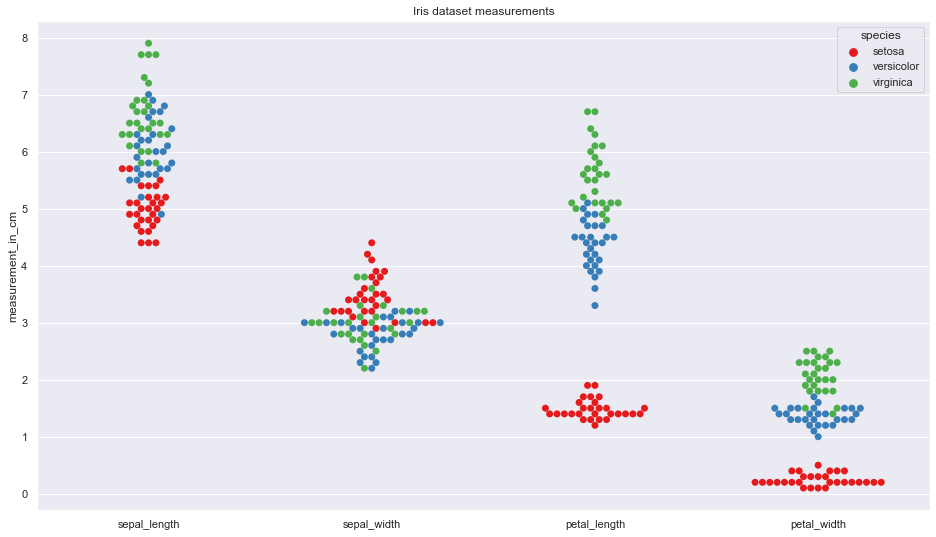

In [125]:
sns.set(font_scale=1)
sns.swarmplot(data=variable_values,
              y='measurement_in_cm',
              x='variable',
              hue='species',
              palette='Set1',
              size=7,
             )

plt.title('Iris dataset measurements')
plt.xlabel('');

Create 4 subplots (2 rows x 2 columns) of scatter plots
1. sepal_length x sepal_width

> Looking at the kernel density plot, Virginica and Versicolor have overlapped sepal length and sepal width values. Using sepal as in our model would give us an inaccurate predicted target.

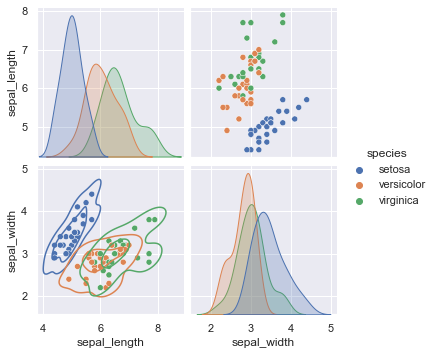

In [126]:
sns.set(font_scale=1)
a = sns.pairplot(train,
                 hue='species',
                 x_vars = ['sepal_length', 'sepal_width'],
                 y_vars = ['sepal_length', 'sepal_width']
                )

a.map_lower(sns.kdeplot, levels=3, color=".2");

2. petal_length x petal_width

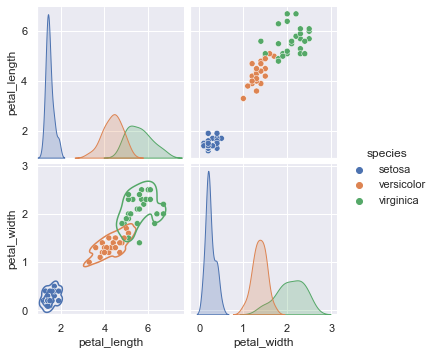

In [127]:
b = sns.pairplot(train,
                 hue='species',
                 x_vars = ['petal_length', 'petal_width'],
                 y_vars = ['petal_length', 'petal_width'],
                 kind='scatter'
                )

b.map_lower(sns.kdeplot, levels=3, color=".2");

3. sepal_area x petal_area

> Petal length x petal width and sepal area v. petal area may be good attributes for our model to predict the species of a new iris. I'll need to perform a statistical test.

In [128]:
train['sepal_area'] = train.sepal_length \
                    * train.sepal_width
train['petal_area'] = train.petal_length \
                    * train.petal_width

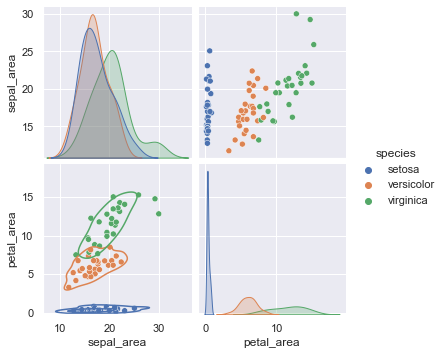

In [129]:
c = sns.pairplot(train,
                 hue='species',
                 x_vars = ['sepal_area', 'petal_area'],
                 y_vars = ['sepal_area', 'petal_area']
                )

c.map_lower(sns.kdeplot, levels=3, color=".2");

4. sepal_length x petal_length

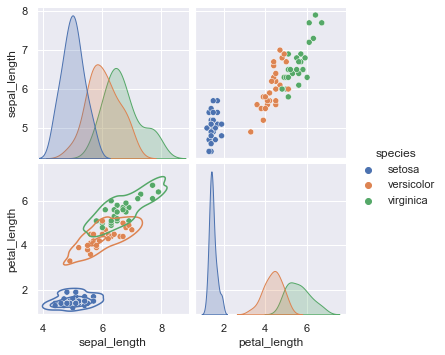

In [130]:
d = sns.pairplot(train,
                 hue='species',
                 x_vars = ['sepal_length', 'petal_length'],
                 y_vars = ['sepal_length', 'petal_length']
                )

d.map_lower(sns.kdeplot, levels=3, color=".2");

Create a heatmap of each variable layering correlation coefficient on top.

In [131]:
corr_train = train[['sepal_length',
                    'sepal_width',
                    'sepal_area',
                    'petal_length',
                    'petal_width',
                    'petal_area'
                     ]].corr()

In [132]:
# Creates a boolean mask of the upper right corner
corr_mask = np.triu( 
    np.ones(corr_train.shape)).astype(np.bool) # Turn 1 into Trues

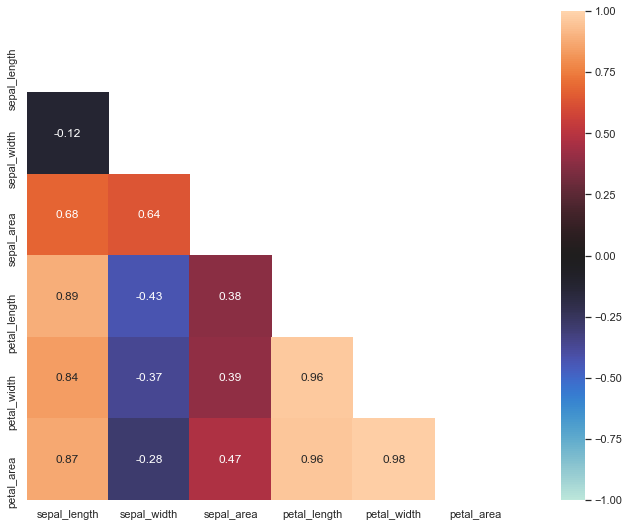

In [133]:
with sns.axes_style("white"):
    sns.heatmap(corr_train,
            mask=corr_mask,
            annot = True,
            vmax = 1,
            vmin = -1,
            center = 0,
            square = True,
            cmap = 'icefire');

Create a scatter matrix visualizing the interaction of each variable

In [134]:
# Columns to filter for.
scatter_data = ['sepal_length',
                'sepal_width',
                'petal_length',
                'petal_width',
                'sepal_area',
                'petal_area'
               ]

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1184: UserWarning: No contour levels were found within the data range.
  **contour_kws,


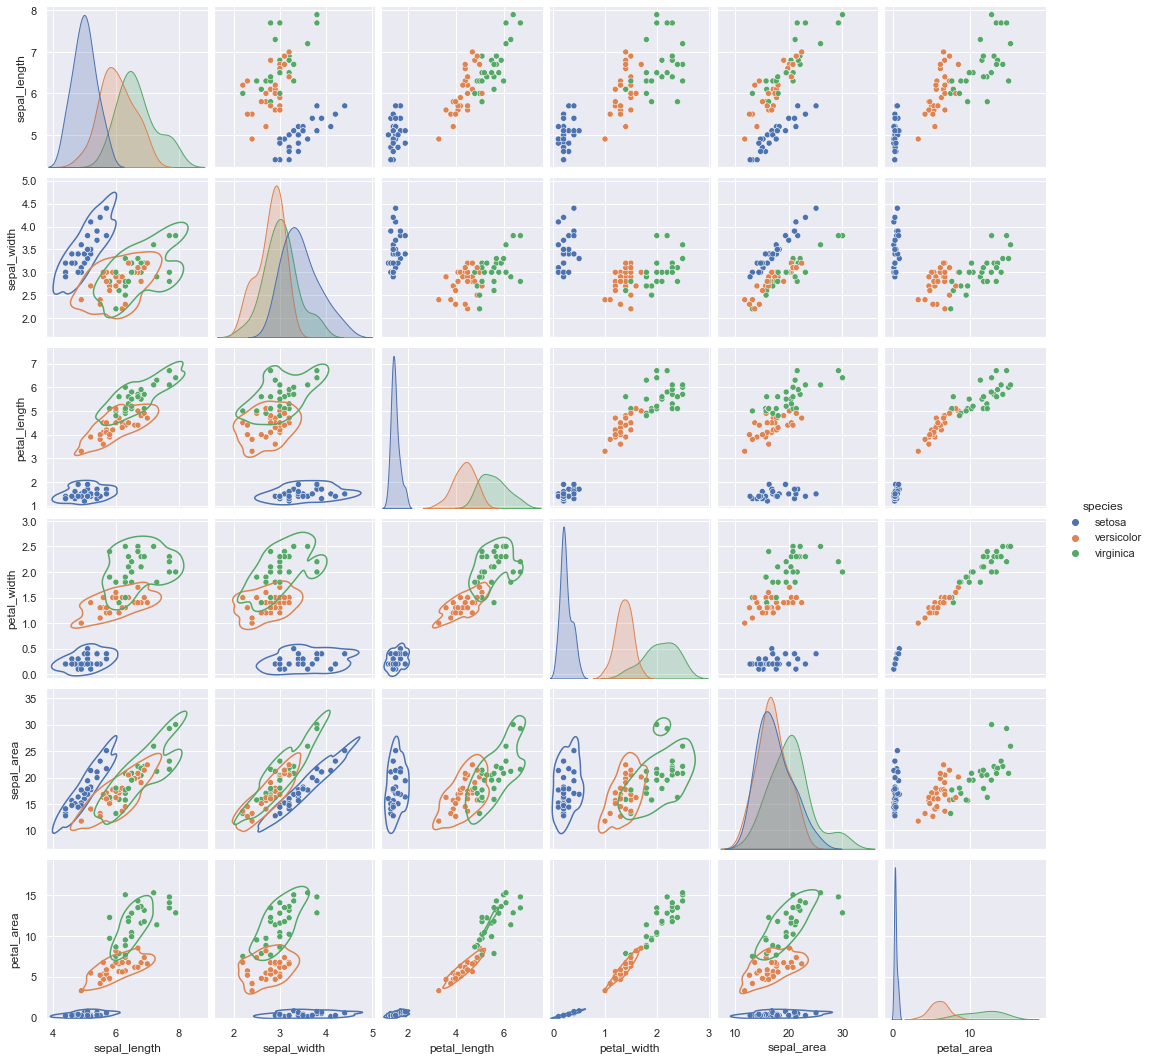

In [135]:
p = sns.pairplot(data=train,
             x_vars=scatter_data,
             y_vars=scatter_data,
             hue='species',
            );


p.map_lower(sns.kdeplot, levels=2, color=".2");

Is the sepal length significantly different in virginica compared to versicolor? Run a statistical experiment to test this.

Make sure to include a null hypothesis, alternative hypothesis, results, and summary.

##### Step 1. Establish Hypotheses
1. Two-sample T-test Hypothesis
2. Set Confidence Interval
3. Calculate alpha.

\$H_{O}$ There is no difference in sepal length in Iris-virginica v. Iris-versicolor.

\$H_{1}$ There is a difference in sepal length in Iris-virginica v. Iris-versicolor.

In [136]:
confidence_interval = 0.95
alpha = 1 - confidence_interval

In [137]:
virginica = train[train.species == 'virginica']
versicolor = train[train.species == 'versicolor']

##### Step 2. Statistical Analysis

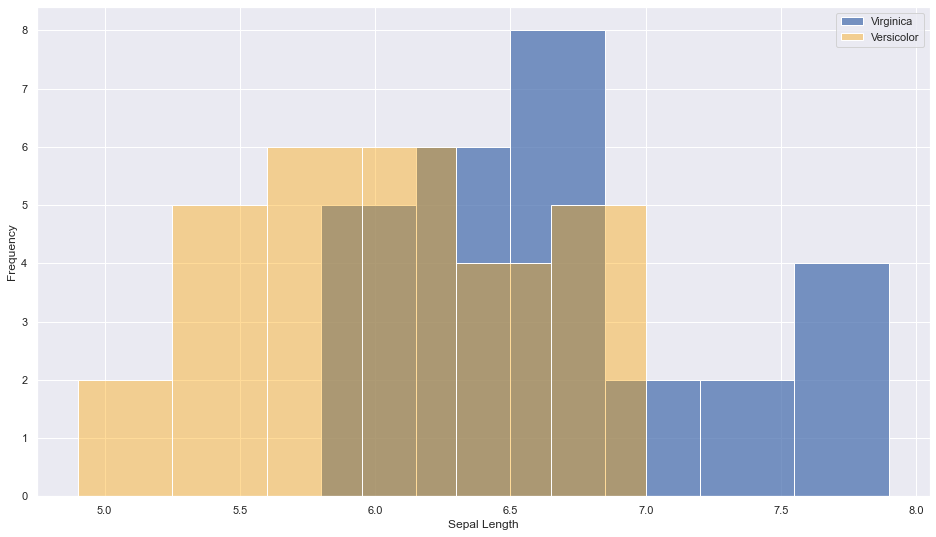

In [138]:
# Compare the distribution of sepal length of Iris-Virginica
# and Iris-Versicolor
sns.histplot(virginica.sepal_length, label='Virginica')
sns.histplot(versicolor.sepal_length,
             label='Versicolor',
             color='orange',
             alpha=.4
            )

plt.ylabel('Frequency')
plt.xlabel('Sepal Length')
plt.legend();

In [139]:
# Create a descriptive stats for Iris-Virginica
virginica_stats = virginica.sepal_length.describe()
virginica_stats.name = 'virginica_sepal_length'

In [140]:
# Create a descriptive stats for Iris-Versicolor
versicolor_stats = versicolor.sepal_length.describe()
versicolor_stats.name = 'versicolor_sepal_length'

In [141]:
# Concatenate both together to compare values.
virg_versi_stats = pd.concat(
    [virginica_stats,
     versicolor_stats],
    axis=1).T
virg_versi_stats

,count,mean,std,min,25%,50%,75%,max
virginica_sepal_length,27.0,6.666667,0.590306,5.8,6.300,6.5,6.900,7.9
versicolor_sepal_length,28.0,6.028571,0.523420,4.9,5.675,6.0,6.325,7.0


##### Determine the appropriate hypothesis

In [142]:
t, p = stats.ttest_ind(virginica.sepal_length, \
                       versicolor.sepal_length)

print(("Two-Sample T-Test: {:.2f}" \
      "\nP-Value: {:.2f}\nalpha: {:.2f}\n").format(t, p, alpha))

if p < alpha:
    print("P-Value is less than alpha:")
    print('Reject HO (for Ha).\nThere is a difference' \
          ' in sepal length between Iris-virginica and Iris-versicolor.')
else:
    print('Fail to reject HO. There is no difference' \
          ' in sepal length between Iris-virginica and Iris-versicolor.')

Two-Sample T-Test: 4.25
P-Value: 0.00
alpha: 0.05

P-Value is less than alpha:
Reject HO (for Ha).
There is a difference in sepal length between Iris-virginica and Iris-versicolor.


In [143]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 35 to 10
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal_length        84 non-null     float64
 1   sepal_width         84 non-null     float64
 2   petal_length        84 non-null     float64
 3   petal_width         84 non-null     float64
 4   species             84 non-null     object 
 5   species_versicolor  84 non-null     uint8  
 6   species_virginica   84 non-null     uint8  
 7   sepal_area          84 non-null     float64
 8   petal_area          84 non-null     float64
dtypes: float64(6), object(1), uint8(2)
memory usage: 5.4+ KB


### Iris Dataset - Extra Visualizations

In [175]:
viz_1 = train[['sepal_length',
               'sepal_width',
               'petal_length',
               'petal_width',
               'species',
               'sepal_area',
               'petal_area'
              ]]

viz_2 = train[['sepal_area',
               'petal_area',
               'species'
              ]]

viz_3 = train[['petal_length',
               'petal_width',
               'species'
              ]]

viz_4 = train[['sepal_length',
               'sepal_width',
               'species'
              ]]

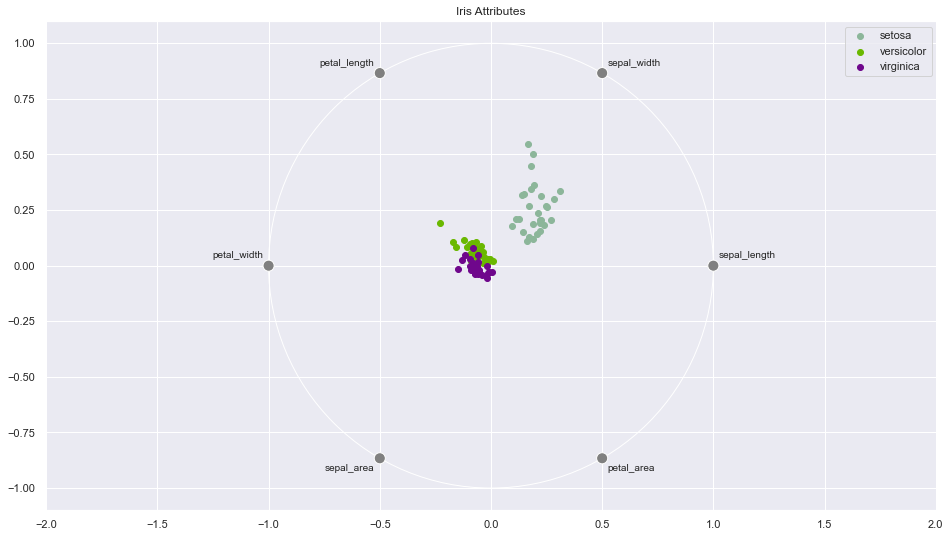

In [176]:
radviz(viz_1, 'species')
plt.title("Iris Attributes");

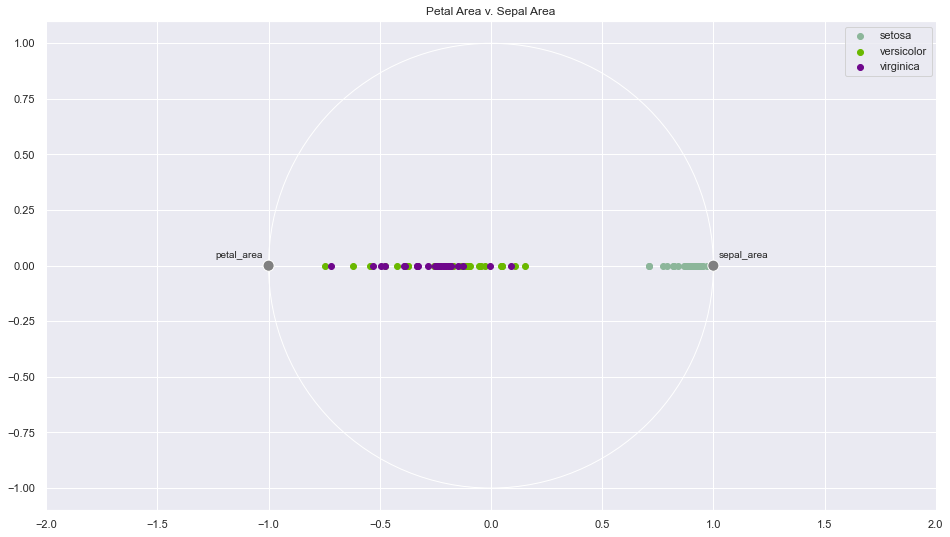

In [177]:
radviz(viz_2, 'species')
plt.title("Petal Area v. Sepal Area");

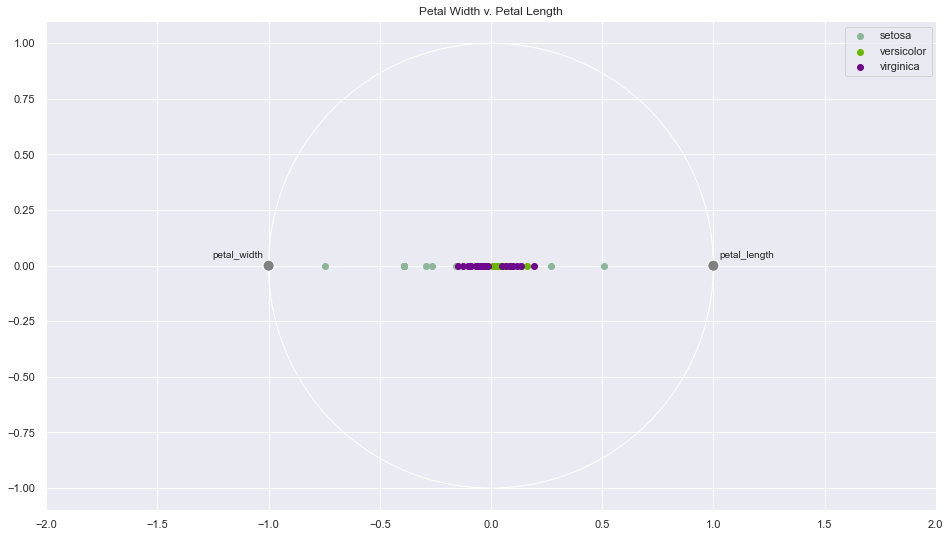

In [180]:
radviz(viz_3, 'species')
plt.title("Petal Width v. Petal Length");

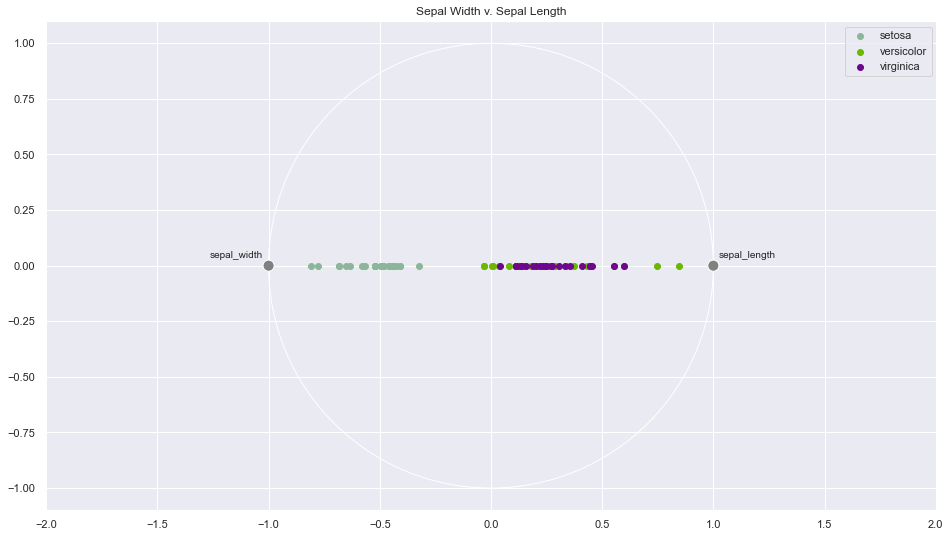

In [181]:
radviz(viz_4, 'species')
plt.title("Sepal Width v. Sepal Length");

## Extra EDA - Iris Dataset

##### Step 1. Establish Hypotheses
1. Two-sample T-test Hypothesis
2. Set Confidence Interval
3. Calculate alpha.

\$H_{O}$ There is no difference in `sepal area` in Iris-virginica v. Iris-versicolor.

\$H_{1}$ There is a difference in `sepal area` in Iris-virginica v. Iris-versicolor.

In [182]:
# Set confidence interval and alpha
confidence_interval = 0.95
alpha = 1 - confidence_interval

In [183]:
virginica = train[train.species == 'virginica']
versicolor = train[train.species == 'versicolor']

##### Step 2. Statistical Analysis

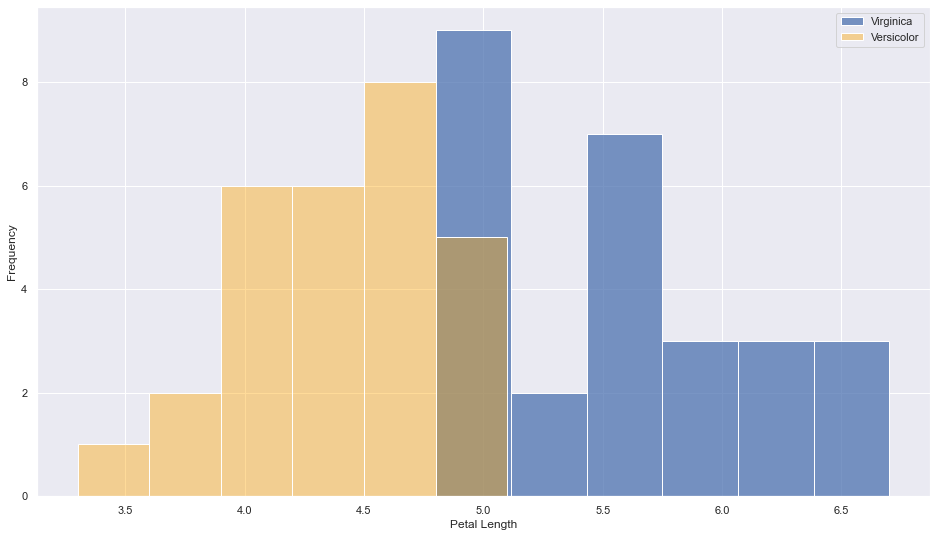

In [184]:
# Compare the distribution of petal length of Iris-Virginica
# and Iris-Versicolor
sns.histplot(virginica.petal_length, label='Virginica')
sns.histplot(versicolor.petal_length,
             label='Versicolor',
             color='orange',
             alpha=.4
            )

plt.ylabel('Frequency')
plt.xlabel('Petal Length')
plt.legend();

In [185]:
# Create a descriptive stats for Iris-Virginica
virginica_stats = virginica.sepal_area.describe()
virginica_stats.name = 'virginica_sepal_area'

# Create a descriptive stats for Iris-Versicolor
versicolor_stats = versicolor.sepal_area.describe()
versicolor_stats.name = 'versicolor_sepal_area'

# Concatenate both together to compare values.
virg_versi_stats = pd.concat(
    [virginica_stats,
     versicolor_stats],
    axis=1).T
virg_versi_stats

,count,mean,std,min,25%,50%,75%,max
virginica_sepal_area,27.0,20.273704,3.856270,13.20,17.780,20.48,21.660,30.02
versicolor_sepal_area,28.0,16.898571,2.693329,11.76,15.515,16.80,18.245,22.40


##### Determine the appropriate hypothesis

In [186]:
t, p = stats.ttest_ind(virginica.sepal_area, \
                       versicolor.sepal_area)

print(("Two-Sample T-Test: {:.2f}" \
      "\nP-Value: {:.2f}\nalpha: {:.2f}\n").format(t, p, alpha))

if p < alpha:
    print("P-Value is less than alpha:")
    print('Reject HO (for Ha).\nThere is a difference' \
          ' in sepal area between Iris-virginica and Iris-versicolor.')
else:
    print('Fail to reject HO. There is no difference' \
          ' in sepal area between Iris-virginica and Iris-versicolor.')

Two-Sample T-Test: 3.77
P-Value: 0.00
alpha: 0.05

P-Value is less than alpha:
Reject HO (for Ha).
There is a difference in sepal area between Iris-virginica and Iris-versicolor.


## Extra EDA - Iris Dataset

In [187]:
df_titanic = acquire.get_titanic_data()
df_titanic = prepare.prep_titanic(df_titanic)

In [188]:
df_titanic.head()

,survived,sex,age,sibsp,parch,fare,class,embark_town,alone,embark_Queenstown,embark_Southampton
0,0,male,0.271174,1,0,0.014151,Third,Southampton,0,0,1
1,1,female,0.472229,1,0,0.139136,First,Cherbourg,0,0,0
2,1,female,0.321438,0,0,0.015469,Third,Southampton,1,0,1
3,1,female,0.434531,1,0,0.103644,First,Southampton,0,0,1
4,0,male,0.434531,0,0,0.015713,Third,Southampton,1,0,1


In [189]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survived            889 non-null    int64  
 1   sex                 889 non-null    object 
 2   age                 889 non-null    float64
 3   sibsp               889 non-null    int64  
 4   parch               889 non-null    int64  
 5   fare                889 non-null    float64
 6   class               889 non-null    object 
 7   embark_town         889 non-null    object 
 8   alone               889 non-null    int64  
 9   embark_Queenstown   889 non-null    uint8  
 10  embark_Southampton  889 non-null    uint8  
dtypes: float64(2), int64(4), object(3), uint8(2)
memory usage: 71.2+ KB


In [190]:
from sklearn.model_selection import train_test_split

In [191]:
train, test = train_test_split(df_titanic,
                               test_size=.3,
                               stratify=df_titanic.survived)

train, validate = train_test_split(train,
                               test_size=.2,
                               stratify=train.survived)

In [192]:
train.head()

,survived,sex,age,sibsp,parch,fare,class,embark_town,alone,embark_Queenstown,embark_Southampton
492,0,male,0.685851,0,0,0.059532,First,Southampton,1,0,1
664,1,male,0.246042,1,0,0.015469,Third,Southampton,0,0,1
16,0,male,0.019854,4,1,0.056848,Third,Queenstown,0,1,0
102,0,male,0.258608,0,1,0.150855,First,Southampton,0,0,1
499,0,male,0.296306,0,0,0.015216,Third,Southampton,1,0,1


In [193]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,497.0,0.382294,0.486437,0.000000,0.000000,0.000000,1.000000,1.000000
age,497.0,0.367854,0.169306,0.004147,0.271174,0.346569,0.447097,0.886906
sibsp,497.0,0.537223,1.128410,0.000000,0.000000,0.000000,1.000000,8.000000
parch,497.0,0.414487,0.818899,0.000000,0.000000,0.000000,1.000000,5.000000
fare,497.0,0.064341,0.091209,0.000000,0.015412,0.029758,0.064412,1.000000
alone,497.0,0.573441,0.495075,0.000000,0.000000,1.000000,1.000000,1.000000
embark_Queenstown,497.0,0.092555,0.290100,0.000000,0.000000,0.000000,0.000000,1.000000
embark_Southampton,497.0,0.724346,0.447293,0.000000,0.000000,1.000000,1.000000,1.000000


Analysis

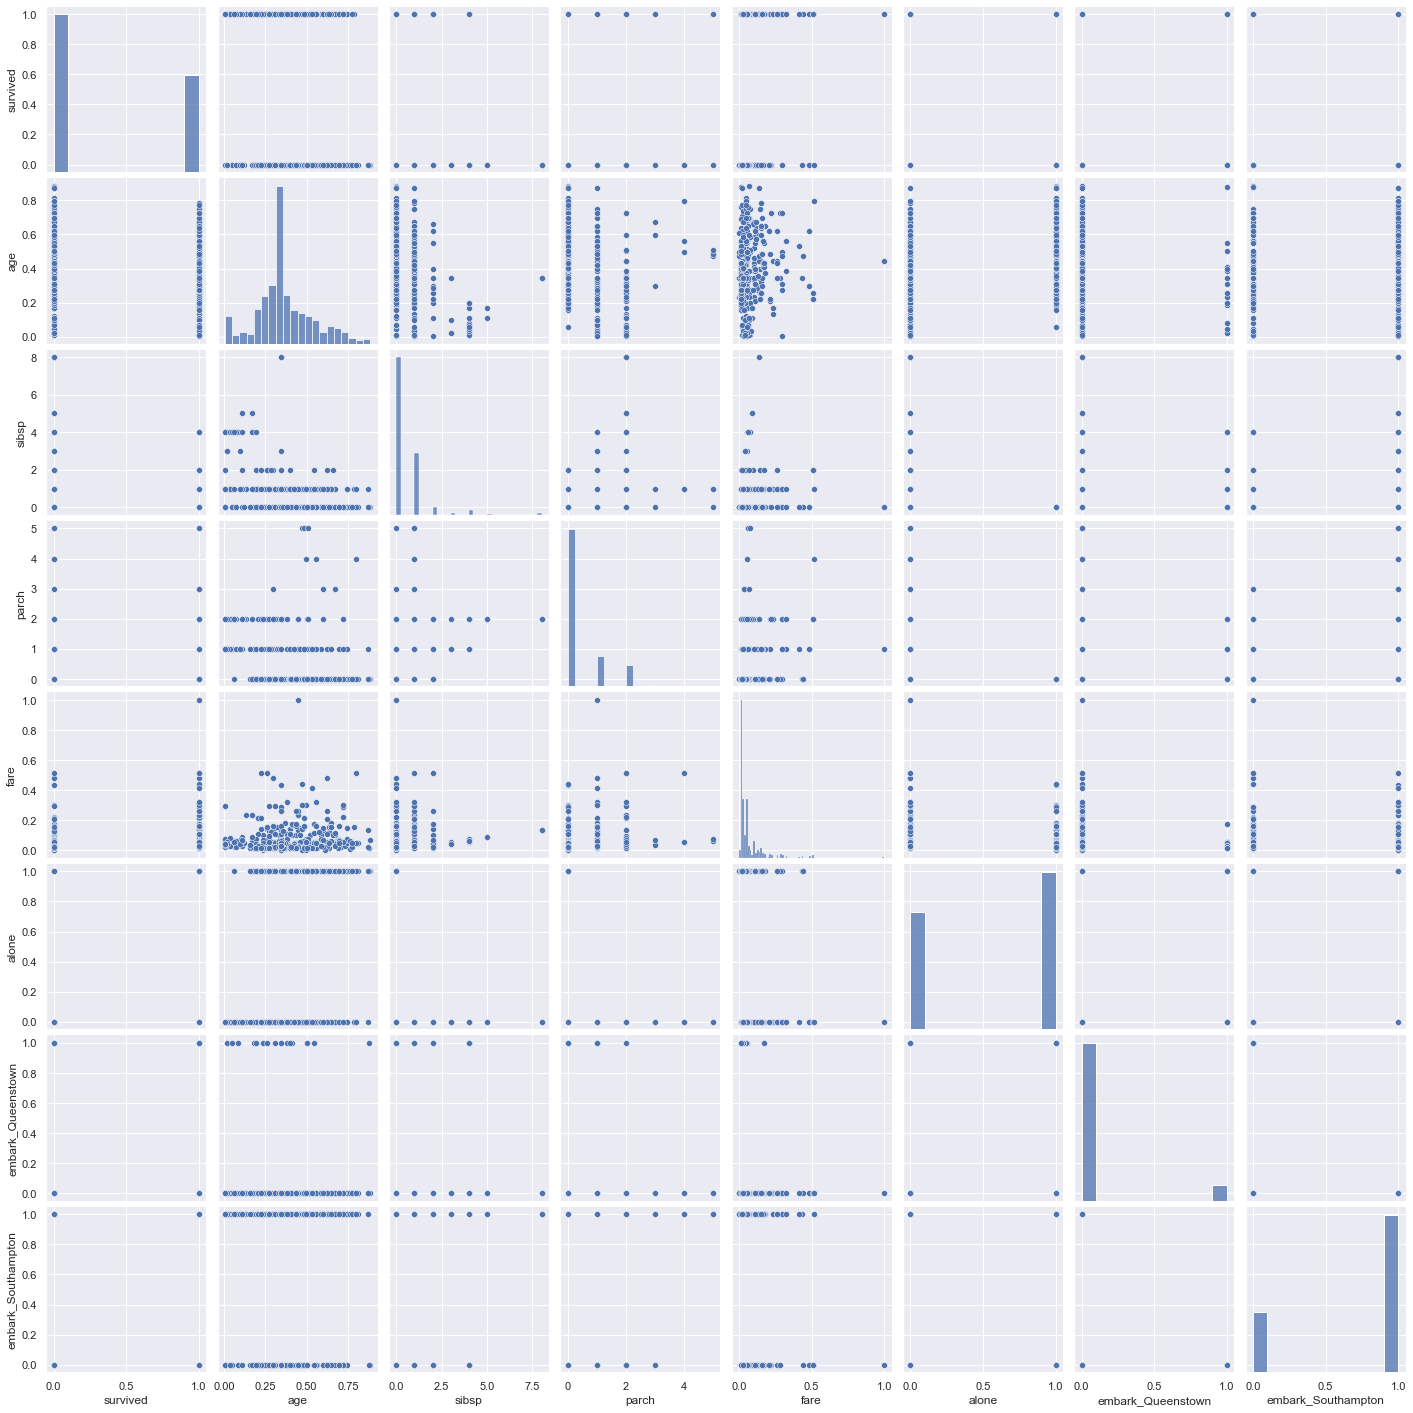

In [194]:
sns.pairplot(train);

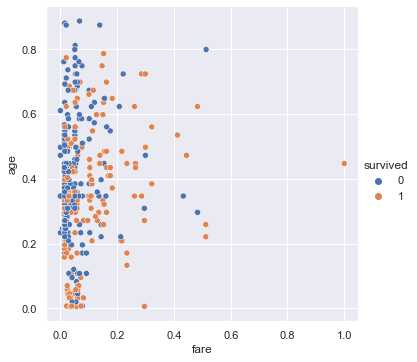

In [195]:
sns.relplot(data=train,
            x='fare',
            y='age',
            hue='survived'
           );

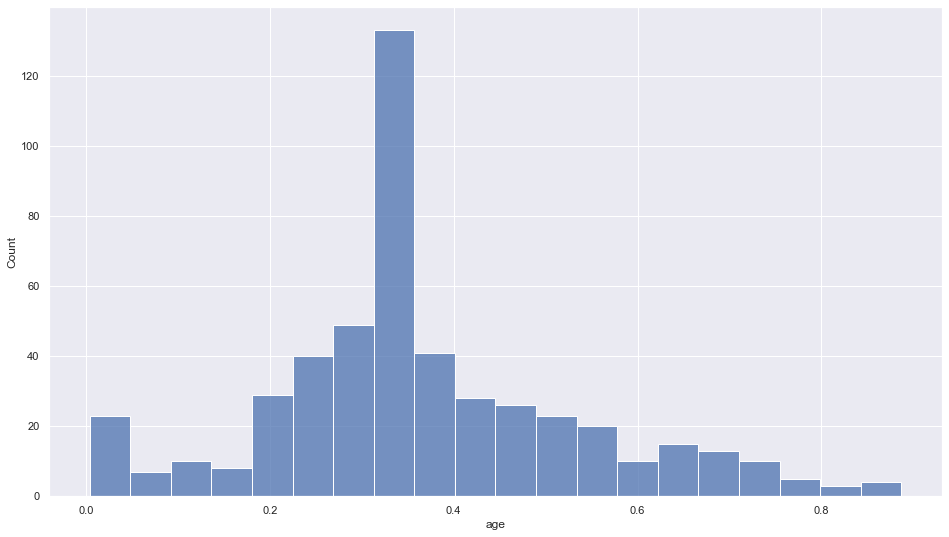

In [196]:
sns.histplot(train.age);